In [1]:
# %load imports.txt
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../../')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports and constants

In [2]:
import os

from src.data_processing.load_data import load_wine
from src.experiments.config import get_config
from src.experiments.experiment import run
from src.settings import REPORT_DIR

PLOT_DIR = os.path.join(REPORT_DIR, 'figures')
NAME = 'wine'
DATA_LOADER_FUNC = load_wine

# Experiments

In [3]:
df, X, y = DATA_LOADER_FUNC(standardize=False)
config = get_config(n_neighbors=list(range(1, len(y))))
df.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  Class  
0                          3.92     1065      1  
1                          3.40     1050      1  
2                          3.17     1185      1  
3                          3.45     1480      1  
4                          2.93      735      1

In [4]:
df_s, X_s, y_s = DATA_LOADER_FUNC(standardize=True)
df_s.head()

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  Class  
0         0.251717  0.362177                      1.847920  1.013009      1  
1        -0.293321  0.406051                      1.113449  0.965242      1  
2         0.269020  0.318304                      0.788587  1.395148      1  
3         1.186068 -0.427544                      1.184071  2.334574      1  
4        -0.319276  0.362177                      0.449601 -0.037874      1

In [5]:
history = run(X, y, config)

In [6]:
history_s = run(X_s, y_s, config)

In [7]:
df_history = pd.DataFrame.from_dict(history)
df_history.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           2           2  0.610337  0.025687   
1        5           30  uniform           2         inf  0.593145  0.021372   
2        5           30  uniform           2           1  0.705567  0.022143   
3        5           30  uniform           1           1  0.816126  0.017687   
4        5           30  uniform           1           2  0.742247  0.021754   

             F1  
0  61.0% ± 2.6%  
1  59.3% ± 2.1%  
2  70.6% ± 2.2%  
3  81.6% ± 1.8%  
4  74.2% ± 2.2%

In [8]:
df_history_s = pd.DataFrame.from_dict(history_s)
df_history_s.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           1           2  0.954504  0.011632   
1        5           30  uniform           1         inf  0.928472  0.009262   
2        5           30  uniform           1           1  0.974538  0.006252   
3        5           30  uniform           2         inf  0.902920  0.011341   
4        5           30  uniform           2           1  0.962836  0.007831   

             F1  
0  95.5% ± 1.2%  
1  92.8% ± 0.9%  
2  97.5% ± 0.6%  
3  90.3% ± 1.1%  
4  96.3% ± 0.8%

In [9]:
df_history['Dataset'] = 'Original'
df_history_s['Dataset'] = 'Standardized'
df_results = pd.concat([df_history, df_history_s])


df_results['N-splits'] = pd.to_numeric(df_results['N-splits'])
df_results['RandomStates'] = pd.to_numeric(df_results['RandomStates'])
df_results['K-neighbors'] = pd.to_numeric(df_results['K-neighbors'])
df_results['F1 mean'] = pd.to_numeric(df_results['F1 mean'])
df_results['F1 std'] = pd.to_numeric(df_results['F1 std'])
df_results['Distance'] = df_results['Minkowski-p'].replace({'1': 'Manhattan',
                                                            '2': 'Euclidean',
                                                            'inf': 'Chebyshev'})

df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            2           2  0.610337   
1            5            30  uniform            2         inf  0.593145   
2            5            30  uniform            2           1  0.705567   
3            5            30  uniform            1           1  0.816126   
4            5            30  uniform            1           2  0.742247   
...        ...           ...      ...          ...         ...       ...   
4063         9            30    gauss          157           2  0.963861   
4064         9            30    gauss          157         inf  0.961256   
4065         9            30    gauss          158           2  0.963861   
4066         9            30    gauss          158           1  0.977396   
4067         9            30    gauss          158         inf  0.961256   

        F1 std            F1       Dataset   Distance  
0     0.025687  61.0% ± 2.6%      Original  Euclidean  
1     0.021372  59.3% ± 2.1%      Original  Chebyshev  
2     0.022143  70.6% ± 2.2%      Original  Manhattan  
3     0.017687  81.6% ± 1.8%      Original  Manhattan  
4     0.021754  74.2% ± 2.2%      Original  Euclidean  
...        ...           ...           ...        ...  
4063  0.009638  96.4% ± 1.0%  Standardized  Euclidean  
4064  0.008638  96.1% ± 0.9%  Standardized  Chebyshev  
4065  0.009638  96.4% ± 1.0%  Standardized  Euclidean  
4066  0.006767  97.7% ± 0.7%  Standardized  Manhattan  
4067  0.008638  96.1% ± 0.9%  Standardized  Chebyshev  

[8136 rows x 10 columns]

In [10]:
df_results['F1 up'] = df_results['F1 mean'] + df_results['F1 std']
df_results['F1 down'] = df_results['F1 mean'] - df_results['F1 std']
df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            2           2  0.610337   
1            5            30  uniform            2         inf  0.593145   
2            5            30  uniform            2           1  0.705567   
3            5            30  uniform            1           1  0.816126   
4            5            30  uniform            1           2  0.742247   
...        ...           ...      ...          ...         ...       ...   
4063         9            30    gauss          157           2  0.963861   
4064         9            30    gauss          157         inf  0.961256   
4065         9            30    gauss          158           2  0.963861   
4066         9            30    gauss          158           1  0.977396   
4067         9            30    gauss          158         inf  0.961256   

        F1 std            F1       Dataset   Distance     F1 up   F1 down  
0     0.025687  61.0% ± 2.6%      Original  Euclidean  0.636024  0.584649  
1     0.021372  59.3% ± 2.1%      Original  Chebyshev  0.614518  0.571773  
2     0.022143  70.6% ± 2.2%      Original  Manhattan  0.727710  0.683425  
3     0.017687  81.6% ± 1.8%      Original  Manhattan  0.833813  0.798439  
4     0.021754  74.2% ± 2.2%      Original  Euclidean  0.764001  0.720493  
...        ...           ...           ...        ...       ...       ...  
4063  0.009638  96.4% ± 1.0%  Standardized  Euclidean  0.973499  0.954223  
4064  0.008638  96.1% ± 0.9%  Standardized  Chebyshev  0.969894  0.952619  
4065  0.009638  96.4% ± 1.0%  Standardized  Euclidean  0.973499  0.954223  
4066  0.006767  97.7% ± 0.7%  Standardized  Manhattan  0.984162  0.970629  
4067  0.008638  96.1% ± 0.9%  Standardized  Chebyshev  0.969894  0.952619  

[8136 rows x 12 columns]

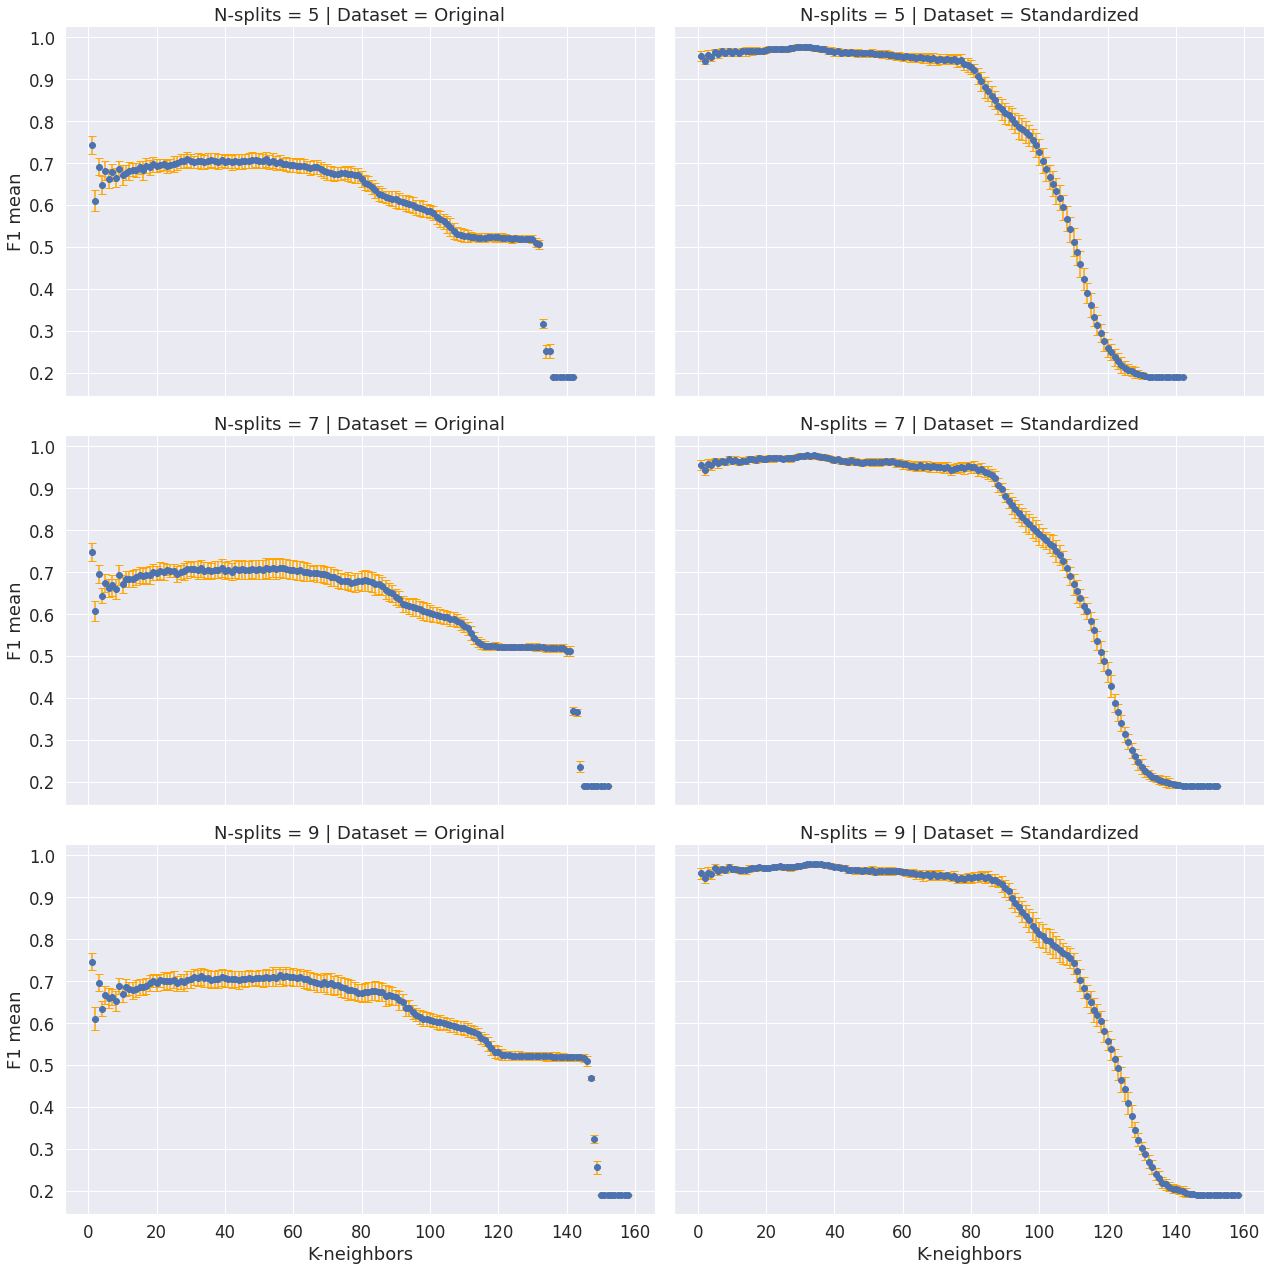

In [11]:
data = df_results[(df_results['Distance'] == 'Euclidean') 
                  & (df_results['Weight'] == 'uniform')]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data, col="Dataset", row="N-splits", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_grid.png'), bbox_inches='tight')

In [12]:
data_weight = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5)]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_weight, col="Dataset", row="Weight", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data_weight), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_weight_grid.png'), bbox_inches='tight')

In [13]:
data_even_odd = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Standardized') 
                         & (df_results['Weight'] == 'uniform')].copy()

data_even_odd = data_even_odd[data_even_odd['K-neighbors'] < 51]

data_even_odd['Parity'] = 'None'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 0, 'Parity'] = 'Even'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 1, 'Parity'] = 'Odd'


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_even_odd, hue='Parity', height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_even_odd), 5))
g.map(plt.scatter, "K-neighbors", "F1 mean").add_legend(frameon=True)
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_even_odd.png'), bbox_inches='tight')

In [14]:
data_detail = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Original') 
                         & (df_results['Weight'] == 'uniform')].copy()

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_detail, height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_detail), 20))
g.map(plt.scatter, "K-neighbors", "F1 mean")
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_detail.png'), bbox_inches='tight')

In [15]:
data_detail

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0           5            30  uniform            2           2  0.610337   
4           5            30  uniform            1           2  0.742247   
7           5            30  uniform            3           2  0.690800   
10          5            30  uniform            4           2  0.647029   
13          5            30  uniform            5           2  0.681755   
..        ...           ...      ...          ...         ...       ...   
413         5            30  uniform          138           2  0.190095   
415         5            30  uniform          139           2  0.190095   
418         5            30  uniform          140           2  0.190095   
421         5            30  uniform          141           2  0.190095   
425         5            30  uniform          142           2  0.190095   

           F1 std            F1   Dataset   Distance     F1 up   F1 down  
0    2.568731e-02  61.0% ± 2.6%  Original  Euclidean  0.636024  0.584649  
4    2.175436e-02  74.2% ± 2.2%  Original  Euclidean  0.764001  0.720493  
7    2.049445e-02  69.1% ± 2.0%  Original  Euclidean  0.711294  0.670305  
10   2.167957e-02  64.7% ± 2.2%  Original  Euclidean  0.668709  0.625349  
13   2.251573e-02  68.2% ± 2.3%  Original  Euclidean  0.704271  0.659239  
..            ...           ...       ...        ...       ...       ...  
413  1.734723e-18  19.0% ± 0.0%  Original  Euclidean  0.190095  0.190095  
415  1.734723e-18  19.0% ± 0.0%  Original  Euclidean  0.190095  0.190095  
418  1.734723e-18  19.0% ± 0.0%  Original  Euclidean  0.190095  0.190095  
421  1.734723e-18  19.0% ± 0.0%  Original  Euclidean  0.190095  0.190095  
425  1.734723e-18  19.0% ± 0.0%  Original  Euclidean  0.190095  0.190095  

[142 rows x 12 columns]

In [16]:
df_results[(df_results['F1 mean'] == df_results['F1 mean'].max())]

N-splits  RandomStates    Weight  K-neighbors Minkowski-p   F1 mean  \
2676         9            30   uniform           11           1  0.984803   
3150         9            30  distance           11           1  0.984803   

        F1 std            F1       Dataset   Distance     F1 up   F1 down  
2676  0.005499  98.5% ± 0.5%  Standardized  Manhattan  0.990302  0.979304  
3150  0.005499  98.5% ± 0.5%  Standardized  Manhattan  0.990302  0.979304

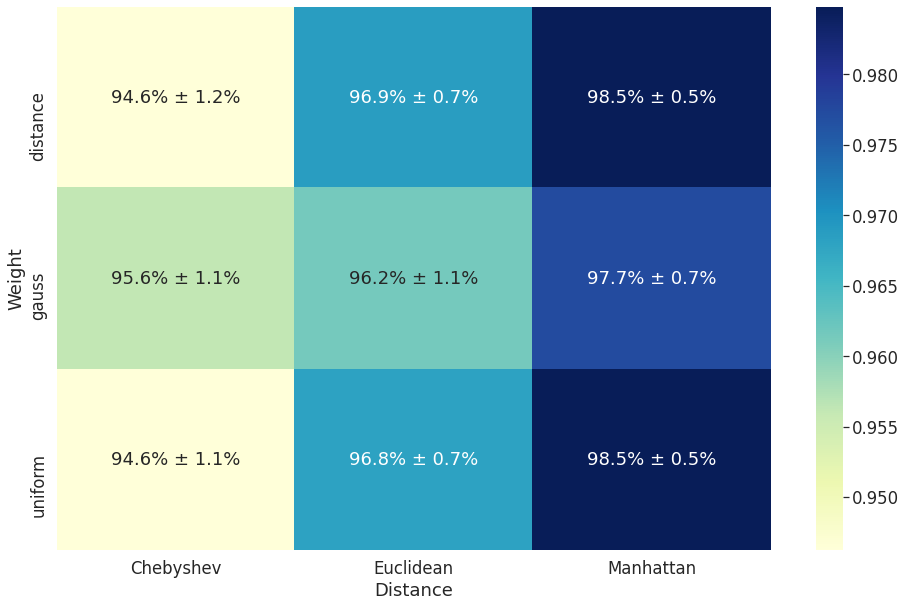

In [18]:
def plot_heatmap(df):
    temp = pd.DataFrame()
    temp['Weight'] = df['Weight']
    temp['Distance'] = df['Distance']
    temp['F1 mean'] = df['F1 mean']
    temp['Labels'] = df['F1']
    
    temp_data = temp.pivot(index='Weight', columns='Distance', values='F1 mean')
    temp_labels = temp.pivot(index='Weight', columns='Distance', values='Labels')

    plt.figure(figsize=(16, 10))
    sns.heatmap(temp_data, annot=temp_labels.to_numpy(), fmt='', cmap="YlGnBu")
    
    plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_heatmap.png'))

    
heatmap_data = df_results[(df_results['K-neighbors'] == 11) 
                          & (df_results['N-splits'] == 9)
                         & (df_results['Dataset'] == 'Standardized')]
plot_heatmap(heatmap_data)